<a href="https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/main/Modulo%205%20-%20Deep%20Leaning/code/DL_01_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# http://www.emergentmind.com/neural-network
# https://hmkcode.com/ai/backpropagation-step-by-step/
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [ ]:
# Revisa la documentacion de python para poder instalar tensorflow.
# Quizas alguno de las siguientes lineas sean de utilidad, o usa la suite anaconda.
# !conda install tensorflow
# !pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X data: (150, 2)
Y data: (150, 2)
L data: (150,)


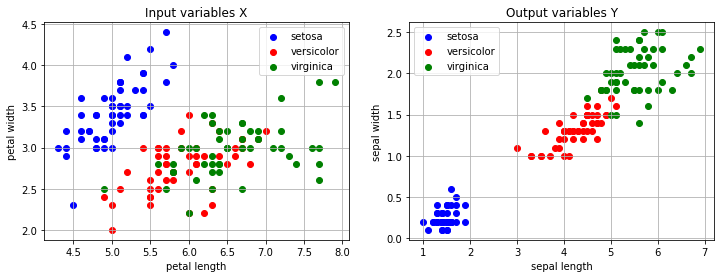

In [ ]:
# Load and split data
from sklearn.datasets import load_iris
iris = load_iris()

# We will use length and width of petals as X to predict length and width of sepals as Y
# We also keep the labels in a vector L
X = iris.data[:, :2]
Y = iris.data[:, 2:]
L = iris.target

print("X data:", X.shape)
print("Y data:", Y.shape)
print("L data:", L.shape)

# Plot it
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label='setosa')
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label='versicolor')
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Input variables X')
plt.subplot(1, 2, 2)
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='setosa')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='versicolor')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Output variables Y')
plt.show()

In [ ]:
# Split it into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, l_train, l_test = train_test_split(X, Y, L, test_size=0.1)

print("Training + validation inputs X:", x_train.shape)
print("Test inputs X:", x_test.shape)
print("Training + validation outputs Y:", y_train.shape)
print("Test outputs Y:", y_test.shape)
print("Training + validation labels l:", l_train.shape)
print("Test labels l:", l_test.shape)

Training + validation inputs X: (135, 2)
Test inputs X: (15, 2)
Training + validation outputs Y: (135, 2)
Test outputs Y: (15, 2)
Training + validation labels l: (135,)
Test labels l: (15,)


In [ ]:
# Documentación de tensorflow y keras
# https://www.tensorflow.org/
# https://keras.io/

In [ ]:
# import tensorflow an the classes Model, Input (place-holder layer), and Dense (fully connected layer)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
# Create an MLP of two inputs x=[x1, x2], and two outputs y=[y1, y2]
i = Input(shape=(2,), name='input')
o = Dense(units=2, activation=None, name='output')(i)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
output (Dense)               (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Obtain weights and biases of the hidden layer
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[-0.13724005  1.0796555 ]
 [-0.27964795  0.19682944]]
Initial biases (2,)
[0. 0.]


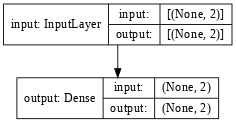

In [ ]:
# Plot a diagram of the MLP model
from tensorflow.keras.utils import plot_model
plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [ ]:
# Here we define the optimizer and loss function
# Adam and mse in this initial example
MLP.compile(optimizer='sgd', loss='mse')

In [ ]:
# And now we train the model
# Learn to predict sepal's lenght and width from petal's lenght and width
HISTORY = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=100, validation_split=0.1)

Epoch 1/100
31/31 [==============================] - 1s 5ms/step - loss: 2.5679 - val_loss: 1.0276
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 1.0052 - val_loss: 0.9302
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.8487 - val_loss: 0.7898
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.7923 - val_loss: 0.7045
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6280 - val_loss: 0.6589
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6187 - val_loss: 0.5448
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5517 - val_loss: 0.7056
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5514 - val_loss: 0.5771
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4870 - val_loss: 0.5736
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4511 - val_loss: 0.4085
Epoch 11/

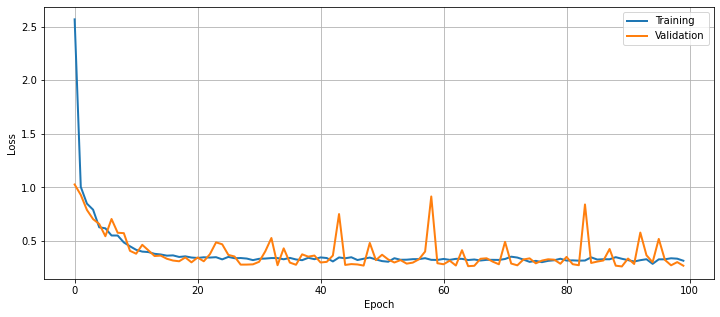

In [ ]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
# Obtain weights and biases of the hidden layer after training
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 1.6246774   0.63239014]
 [-1.6524009  -0.65453386]]
Initial biases (2,)
[-0.6828322  -0.51783246]


In [ ]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.33671873807907104

In [ ]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(15, 2)


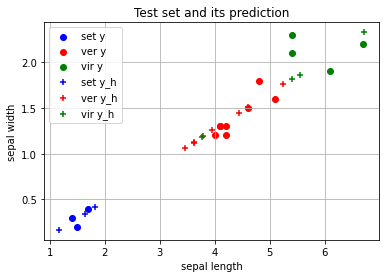

In [ ]:
 # Plot y_test_hat
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_h')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_h')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_h')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()

In [ ]:
# Create a larger MLP
i = Input(shape=(2,), name='input')
h = Dense(units=32, activation='sigmoid', name='hidden1')(i)
h = Dense(units=64, activation='sigmoid', name='hidden2')(h)
h = Dense(units=32, activation='sigmoid', name='hidden3')(h)
o = Dense(units=2, activation='sigmoid', name='output')(h)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
hidden1 (Dense)              (None, 32)                96        
_________________________________________________________________
hidden2 (Dense)              (None, 64)                2112      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 2)                 66        
Total params: 4,354
Trainable params: 4,354
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile it
MLP.compile(optimizer='sgd', loss='mse')

In [ ]:
# Train it
MLP.fit(x=x_train, y=y_train, batch_size=8, epochs=100, verbose=2, validation_split=0.1)

Epoch 1/100
16/16 - 0s - loss: 6.7304 - val_loss: 6.4193
Epoch 2/100
16/16 - 0s - loss: 6.2379 - val_loss: 6.0846
Epoch 3/100
16/16 - 0s - loss: 6.0052 - val_loss: 5.9303
Epoch 4/100
16/16 - 0s - loss: 5.8916 - val_loss: 5.8372
Epoch 5/100
16/16 - 0s - loss: 5.8213 - val_loss: 5.7746
Epoch 6/100
16/16 - 0s - loss: 5.7732 - val_loss: 5.7299
Epoch 7/100
16/16 - 0s - loss: 5.7388 - val_loss: 5.6917
Epoch 8/100
16/16 - 0s - loss: 5.7093 - val_loss: 5.6674
Epoch 9/100
16/16 - 0s - loss: 5.6905 - val_loss: 5.6478
Epoch 10/100
16/16 - 0s - loss: 5.6752 - val_loss: 5.6309
Epoch 11/100
16/16 - 0s - loss: 5.6621 - val_loss: 5.6156
Epoch 12/100
16/16 - 0s - loss: 5.6502 - val_loss: 5.6055
Epoch 13/100
16/16 - 0s - loss: 5.6423 - val_loss: 5.5970
Epoch 14/100
16/16 - 0s - loss: 5.6357 - val_loss: 5.5889
Epoch 15/100
16/16 - 0s - loss: 5.6294 - val_loss: 5.5809
Epoch 16/100
16/16 - 0s - loss: 5.6232 - val_loss: 5.5748
Epoch 17/100
16/16 - 0s - loss: 5.6184 - val_loss: 5.5695
Epoch 18/100
16/16 - 0s

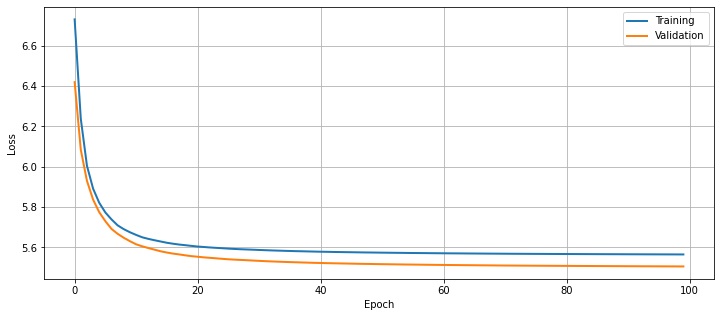

In [ ]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
# Obtain weights and biases of the hidden layer
for layer in MLP.layers[1:]:
  w, b = layer.get_weights()
  print("Weights: ", w.shape, end='\t') #print(w)
  print("Biases:  ", b.shape) #print(b)

Weights:  (2, 32)	Biases:   (32,)
Weights:  (32, 64)	Biases:   (64,)
Weights:  (64, 32)	Biases:   (32,)
Weights:  (32, 2)	Biases:   (2,)


In [ ]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

6.656439304351807

In [ ]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(15, 2)


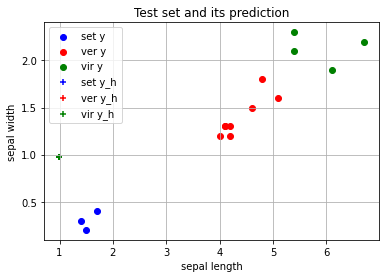

In [ ]:
# Plot y_test_hat
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_h')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_h')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_h')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()

In [ ]:
# Auxiliar function to create an MLP
def create_MLP(n_units=[2, 1], activations=None, last_activation=None):
  h = i = Input(shape=(n_units[0]))
  for units in n_units[1:-1]:
    h = Dense(units=units, activation=activations)(h)
  o = Dense(units=n_units[-1], activation=last_activation)(h)
  return Model(inputs=i, outputs=o)

In [ ]:
# Corre el experimento 100 veces y registra el desempeño promedio y el tiempo de ejecución
loss = np.zeros((10, 2))
for ind in range(10):
  MLP = create_MLP([2, 32, 16, 8, 2], activations='sigmoid', last_activation='relu')
  MLP.compile(optimizer='sgd', loss='mse')
  MLP.fit(x=x_train, y=y_train, batch_size=8, epochs=100, verbose=0, validation_split=0.2)
  loss[ind, 0] = MLP.evaluate(x=x_train, y=y_train, verbose=False)
  loss[ind, 1] = MLP.evaluate(x=x_test, y=y_test, verbose=False)
  print(f"Run {ind+1:3d} -- ", end='')
  print(f"Train loss: {loss[ind, 0]:6.4f}", end='; ')
  print(f"Test loss: {loss[ind, 1]:6.4f}")

print("Average -- ", end='')
print(f" train loss: {loss[:, 0].mean():6.4f} +- {loss[:, 0].std():6.4f}", end='; ')
print(f" test loss: {loss[:, 1].mean():6.4f} +- {loss[:, 1].std():6.4f}")

Run   1 -- Train loss: 0.1389; Test loss: 0.1718
Run   2 -- Train loss: 1.0654; Test loss: 1.2951
Run   3 -- Train loss: 1.1532; Test loss: 1.3023
Run   4 -- Train loss: 1.0946; Test loss: 1.3636
Run   5 -- Train loss: 9.3527; Test loss: 10.6733
Run   6 -- Train loss: 0.1326; Test loss: 0.2068
Run   7 -- Train loss: 0.1269; Test loss: 0.1676
Run   8 -- Train loss: 1.0719; Test loss: 1.2687
Run   9 -- Train loss: 0.1379; Test loss: 0.1808
Run  10 -- Train loss: 8.4103; Test loss: 9.6046
Average --  train loss: 2.2684 +- 3.3411;  test loss: 2.6235 +- 3.7989
